<a href="https://colab.research.google.com/github/greyhound101/work_in_progress/blob/master/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
df=pd.read_csv('Tweets.csv')
df=df.sample(frac=1).reset_index(drop=True)
z=df.isna().sum()
z[z>0]

negativereason                5462
negativereason_confidence     4118
airline_sentiment_gold       14600
negativereason_gold          14608
tweet_coord                  13621
tweet_location                4733
user_timezone                 4820
dtype: int64

In [9]:
#It seems logical to fill columns like negativereason,negativereason_confidence by unique value for each kind of sentiment.
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [0]:
#filling numerical columns by 999
num=['airline_sentiment_confidence','negativereason_confidence','retweet_count']
df[num]=df[num].fillna(999)


In [11]:
#Dropping columns having more than 10,000 nan
dps=['airline_sentiment_gold','negativereason_gold','tweet_coord','tweet_id']
df=df.drop(dps,1)
list(df)

['airline_sentiment',
 'airline_sentiment_confidence',
 'negativereason',
 'negativereason_confidence',
 'airline',
 'name',
 'retweet_count',
 'text',
 'tweet_created',
 'tweet_location',
 'user_timezone']

In [12]:
#Lets look at categorical columns
df.select_dtypes(include='object').nunique()

airline_sentiment        3
negativereason          10
airline                  6
name                  7701
text                 14427
tweet_created        14247
tweet_location        3081
user_timezone           85
dtype: int64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


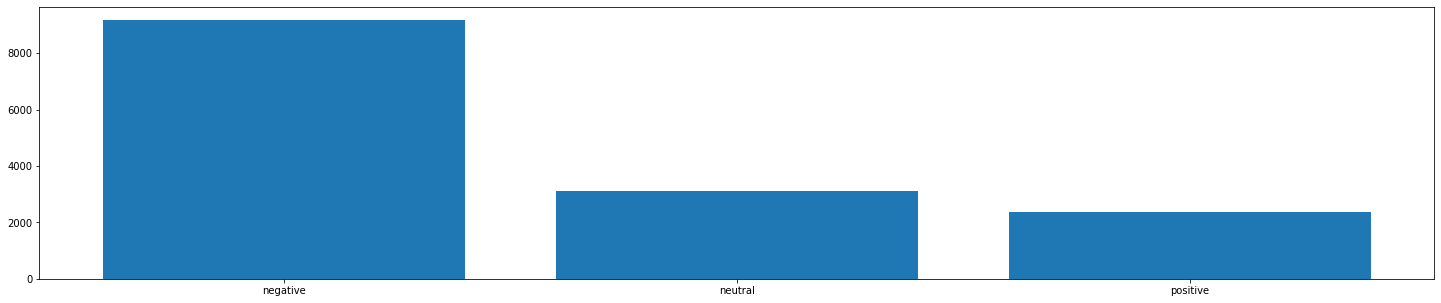

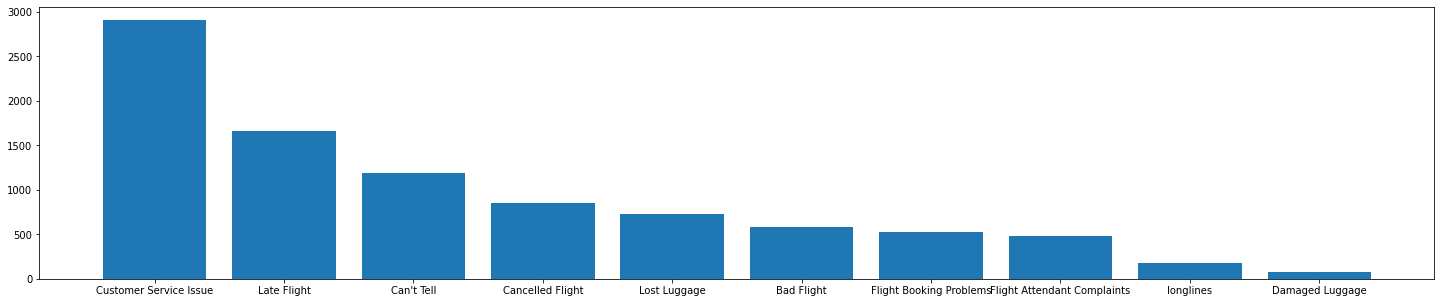

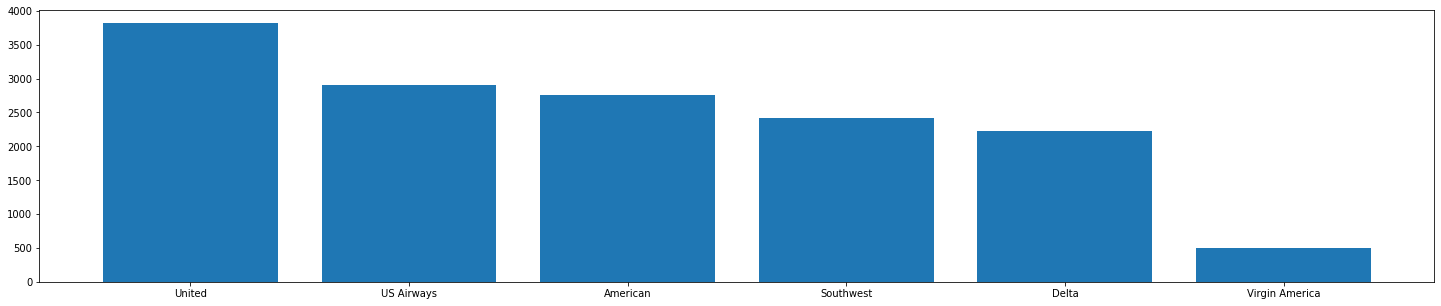

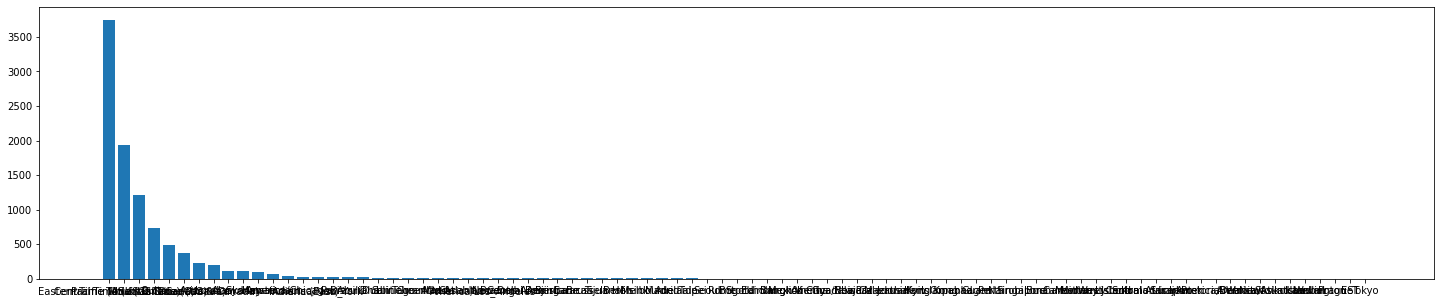

In [13]:
#Possible categorical columns are airline_sentiment,negativereason,airline,user_timezone and possible text columns are name,text,text_created.(Basing on number of uniques)
import seaborn as sns
from matplotlib import pyplot as plt
cat=['airline_sentiment','negativereason','airline','user_timezone']
for i in cat:
    a=df[i].value_counts()
    fig=plt.bar(x=a.index,height=a.values)
    plt.gcf().set_size_inches(25,5)
    plt.show()

In [14]:
df['user_timezone'].value_counts()

Eastern Time (US & Canada)    3744
Central Time (US & Canada)    1931
Pacific Time (US & Canada)    1208
Quito                          738
Atlantic Time (Canada)         497
                              ... 
Istanbul                         1
Wellington                       1
Prague                           1
EST                              1
Tokyo                            1
Name: user_timezone, Length: 85, dtype: int64

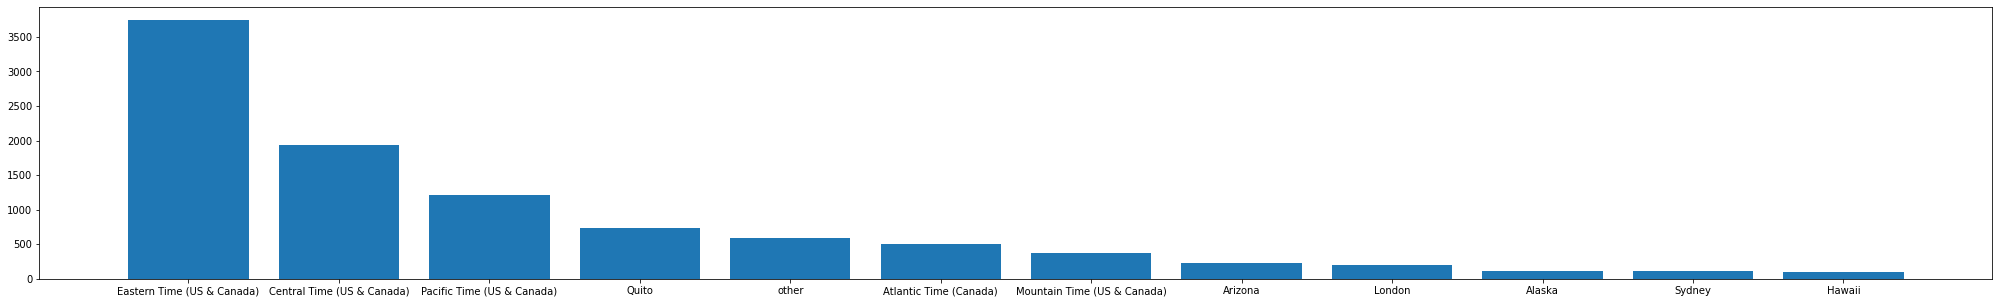

In [16]:
z=df['user_timezone'].value_counts()
df['user_timezone']=df['user_timezone'].replace(z[z<100].index,'other')
a=df['user_timezone'].value_counts()
fig=plt.bar(x=a.index,height=a.values)
plt.gcf().set_size_inches(35,5)
    

In [17]:
#texts
texts=['name','text','tweet_created']
df[texts]

,name,text,tweet_created
0,kathyjazztx,@AmericanAir - AA1344 Cancelled Flighted on 2....,2015-02-22 16:09:21 -0800
1,DanielaRisa,@USAirways is there gonna be a better day to c...,2015-02-18 12:14:18 -0800
2,emc3e17,@USAirways if you've got room on an earlier fl...,2015-02-19 08:43:05 -0800
3,sacsmitty,@united My post was just more of disappointmen...,2015-02-23 20:13:20 -0800
4,meredithstille,@united lets see of we can do this today! Hopi...,2015-02-20 03:19:58 -0800
...,...,...,...
14635,Sb5551,@USAirways unfortunately patience won't get me...,2015-02-22 04:34:06 -0800
14636,gianagon,@VirginAmerica everything was fine until you l...,2015-02-23 13:08:21 -0800
14637,clarelanusse,@SouthwestAir super disappointed today. First ...,2015-02-17 10:50:32 -0800
14638,dandd53,@SouthwestAir how do I get a companion pass,2015-02-22 18:39:11 -0800


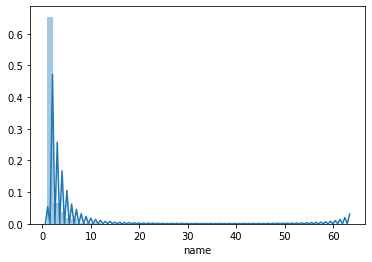

In [18]:
sns.distplot(df['name'].value_counts())

In [0]:
df['name_count']=df['name'].map(df['name'].value_counts())
df['tweet_created']=pd.to_datetime(df['tweet_created'])

In [0]:
df['hour']=df['tweet_created'].dt.hour
df['month']=df['tweet_created'].dt.month
df['day']=df['tweet_created'].dt.day

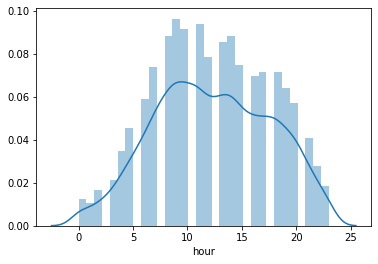

In [21]:
sns.distplot(df['hour'])

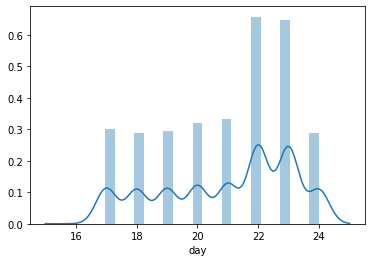

In [22]:
sns.distplot(df['day'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


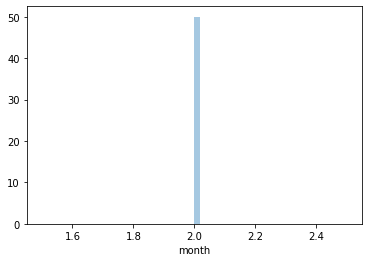

In [23]:
sns.distplot(df['month'])

In [0]:
def func(data):
    return len(data.split(' '))
df['text_len']=df['text'].str.len()

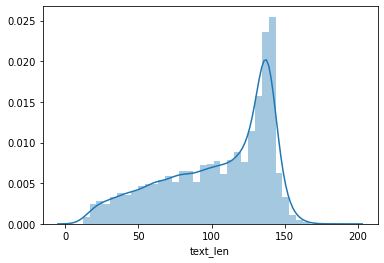

In [27]:
sns.distplot(df['text_len'])

In [28]:
#bivarient data
dps=['name','text','tweet_created','user_timezone','month']
df=df.drop(dps,1)
from sklearn.preprocessing import LabelEncoder
ls=list(df.select_dtypes(include=object))
for col in ls:
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col].astype(str))
df.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,retweet_count,tweet_location,name_count,hour,day,text_len,text_word
0,0,1.0000,2,1.0,0,0,2844,5,16,22,126,25
1,0,1.0000,3,1.0,3,0,551,1,12,18,138,27
2,1,0.3511,10,0.0,3,0,2844,1,8,19,101,21
3,1,0.7029,10,0.0,4,0,1997,2,20,23,136,27
4,1,0.6875,10,0.0,4,0,1599,3,3,20,136,17


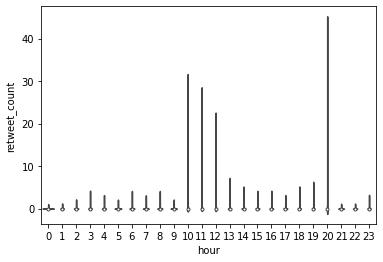

In [29]:

sns.violinplot(x=df['hour'],y=df['retweet_count'])

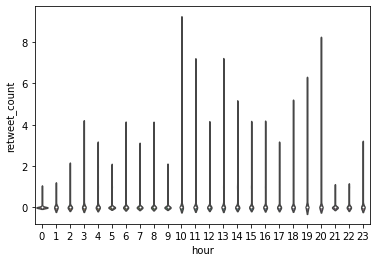

In [30]:
# Seems most tweets generated in hour 10-20 are mostly retweeted.However it could be outliers so lets check for less than 10 retweets
sdo=df.loc[df['retweet_count']<10]
sns.violinplot(x=sdo['hour'],y=sdo['retweet_count'])

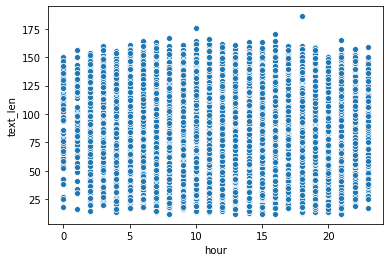

In [31]:
#Seeme it wasent outlier tweets are mostly retweetd in 10-20.
sns.scatterplot(df['hour'],df['text_len'])

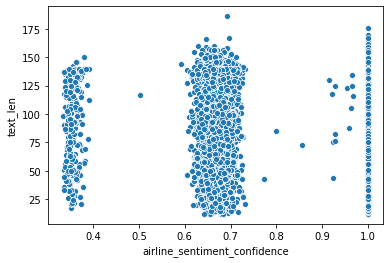

In [32]:
#Funny people are as eager to write long texts at midnight(less populated hour) as in noon(busy hory)
sns.scatterplot(df['airline_sentiment_confidence'],df['text_len'])

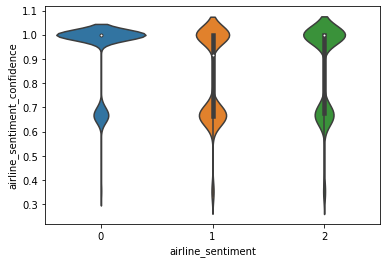

In [33]:
#Lets see confidence for each sentiment
sns.violinplot(x=df['airline_sentiment'],y=df['airline_sentiment_confidence'])

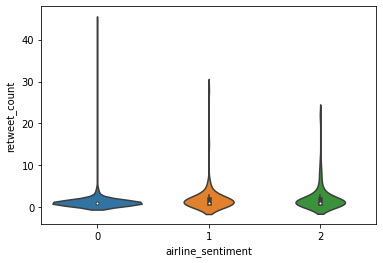

In [34]:
sdo=df.loc[df['retweet_count']>0]
sns.violinplot(x=sdo['airline_sentiment'],y=sdo['retweet_count'])

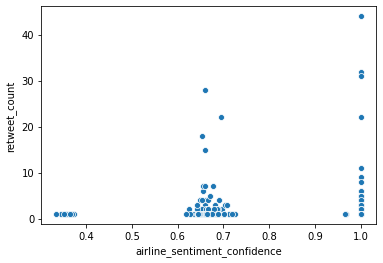

In [35]:
#Seems sentiment 1,2 are retweed higher than 0 since its mean is higher
sns.scatterplot(x=sdo['airline_sentiment_confidence'],y=sdo['retweet_count'])

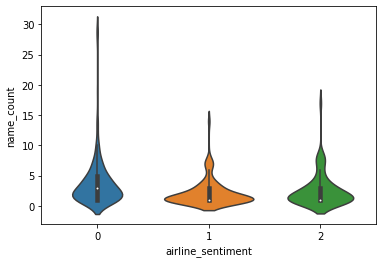

In [36]:
#Seems confidence has a direct positive impact on number of retweets also confidence could be easily binned.
sns.violinplot(x=sdo['airline_sentiment'],y=sdo['name_count'])

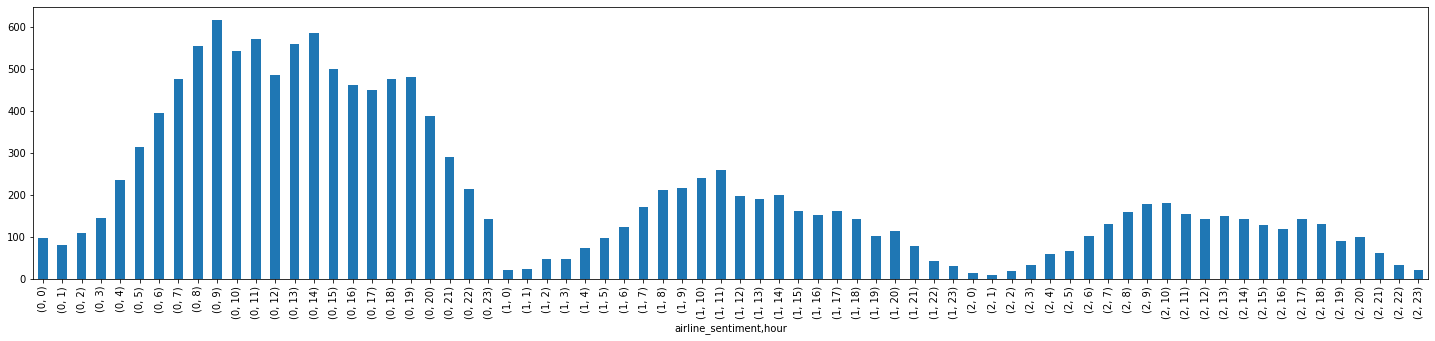

In [37]:
#0 has large outliers and people who are less frequent tend to have a 1 sentiment
df.groupby(['airline_sentiment','hour'])['airline_sentiment'].count().plot(kind='bar')
plt.gcf().set_size_inches(25,5)

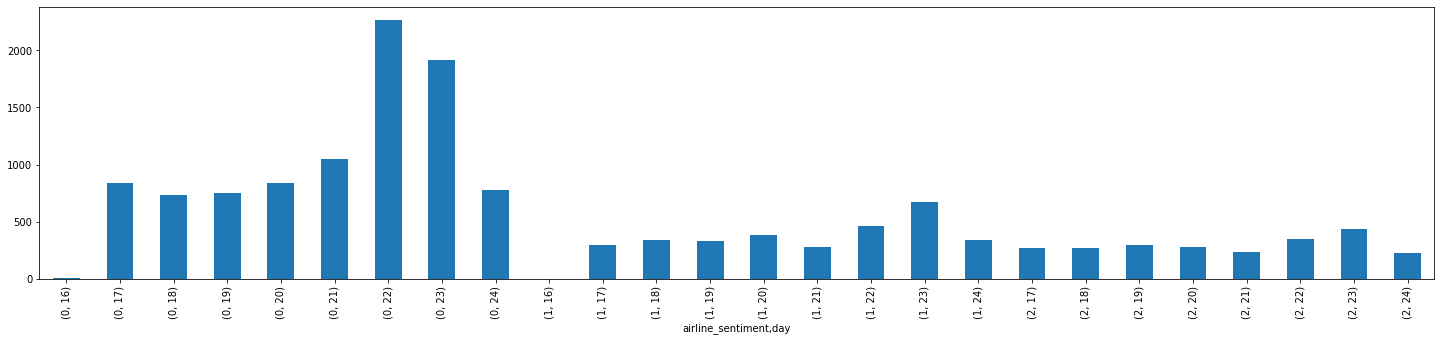

In [38]:
#Seems hour colud be important
df.groupby(['airline_sentiment','day'])['airline_sentiment'].count().plot(kind='bar')
plt.gcf().set_size_inches(25,5)

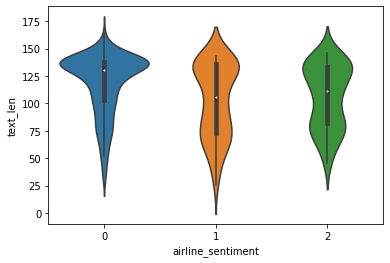

In [39]:
#One thing to observe is that after large number of customers in 22 0 decreases and 1,2 increases for 23.Thus number of customers in previous day could be an important column.
sns.violinplot(x=sdo['airline_sentiment'],y=sdo['text_len'])

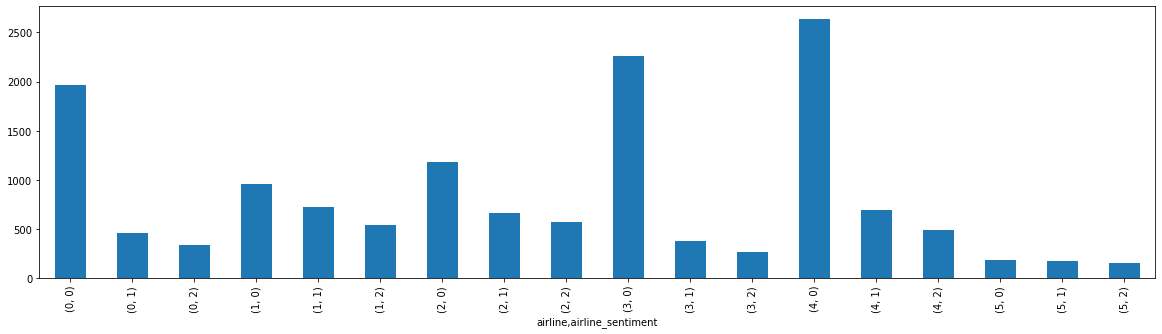

In [40]:
df.groupby(['airline','airline_sentiment'])['airline_sentiment'].count().plot(kind='bar')
plt.gcf().set_size_inches(20,5)

In [0]:
#The main feature is clearly the tweet however previous day passenger count  hour could be important along with word length,name_count.